In [316]:
import pandas as pd
import numpy as np

# get hco data
hco_data_istanbul = pd.read_csv('./data/hco_data_istanbul.csv')

# get sales data
df = pd.read_csv('./data/istanbul_data.csv')
drop_columns = ['Year_Month', 'Lat', 'Lon', 'City']
df = df.drop(columns=drop_columns)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4201059 entries, 0 to 4201058
Data columns (total 16 columns):
 #   Column           Dtype  
---  ------           -----  
 0   MainDistID       int64  
 1   DistID           int64  
 2   Date             object 
 3   HcoID            int64  
 4   SalesRegionID_x  int64  
 5   BrandID          int64  
 6   SkuID            int64  
 7   IsReturn         int64  
 8   PaidQty          float64
 9   FGQty            float64
 10  IsMrsOrder       int64  
 11  HcoType          object 
 12  District         object 
 13  SalesRegionID_y  int64  
 14  Status           object 
 15  TotalQuantity    int64  
dtypes: float64(2), int64(10), object(4)
memory usage: 512.8+ MB


In [317]:
name_cols = ['MainDistID', 'DistID', 'HcoID', 'SkuID']
categorical_cols = ['SalesRegionID_x','SalesRegionID_y', 'HcoType', 'District', 'Status', ]
numerical_cols = ['PaidQty', 'FGQty', 'TotalQuantity']
boolean_cols = ['IsReturn', 'IsMrsOrder']
df['Date'] = pd.to_datetime(df['Date'])

# convert categorical columns to 'category' data type
for col in categorical_cols:
    df[col] = df[col].astype('category')

# convert numerical columns to 'int' data type
for col in numerical_cols:
    df[col] = df[col].astype('int')
    
# convert name columns to str data type
for col in name_cols:
    df[col] = df[col].astype(str)
    
# convert boolean columns to 'bool' data type
for col in boolean_cols:
    df[col] = df[col].astype(bool)
    
df = df.set_index('Date')    
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4201059 entries, 2019-01-16 to 2021-12-30
Data columns (total 15 columns):
 #   Column           Dtype   
---  ------           -----   
 0   MainDistID       object  
 1   DistID           object  
 2   HcoID            object  
 3   SalesRegionID_x  category
 4   BrandID          int64   
 5   SkuID            object  
 6   IsReturn         bool    
 7   PaidQty          int64   
 8   FGQty            int64   
 9   IsMrsOrder       bool    
 10  HcoType          category
 11  District         category
 12  SalesRegionID_y  category
 13  Status           category
 14  TotalQuantity    int64   
dtypes: bool(2), category(5), int64(4), object(4)
memory usage: 316.5+ MB


In [318]:
# if IsReturn == 1, then make TotalQuantity negative
df['TotalQuantity'] = np.where(df['IsReturn'] == 1, -df['TotalQuantity'], df['TotalQuantity'])

In [319]:
# select isReturn column = 1
isReturn1 = df[df['IsReturn'] == 1]
isReturn1.head()

,MainDistID,DistID,HcoID,SalesRegionID_x,BrandID,SkuID,IsReturn,PaidQty,FGQty,IsMrsOrder,HcoType,District,SalesRegionID_y,Status,TotalQuantity
Date,,,,,,,,,,,,,,,
2019-12-10,2879249,2878795,2885754,1000000,25,541,True,1,0,False,P,SANCAKTEPE,630101,Active,-1
2019-06-12,2879266,2878721,2860455,340502,107,29230,True,1,0,False,P,BAKIRKÖY,340502,Active,-1
2019-01-05,2879266,2878724,2862447,341903,21,522,True,1,0,False,P,KÜÇÜKÇEKMECE,341903,Active,-1
2019-03-28,2879266,2878724,2862447,341903,113,16870,True,3,0,False,P,KÜÇÜKÇEKMECE,341903,Active,-3
2019-04-12,2879266,2878724,2862447,341903,15,319,True,1,0,False,P,KÜÇÜKÇEKMECE,341903,Active,-1


### Seçilenler

- I. Segment: 568 (challenge olan), 578, 1050
- II. Segment: 319 (en stabil olan), 509/615, 1018 (düşük satışlı olan)

In [320]:
segment_1_sku_ids = ['568', '578', '1050']
segment_2_sku_ids = ['319', '509', '615', '1018']

In [321]:
# Create a new dataframe for the selected SKUs
selected_skus = ['319']
selected_skus_df = df[df['SkuID'].isin(selected_skus)]

In [322]:
# select features and target variable
selected_features = ['MainDistID', 'DistID', 'HcoID', 'HcoType', 'Status', 'IsReturn', 'IsMrsOrder', 'PaidQty', 'FGQty', 'TotalQuantity']
target_variable = 'TotalQuantity'

In [323]:
selected_skus_df = selected_skus_df[selected_features]
selected_skus_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 206690 entries, 2019-01-31 to 2021-12-28
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   MainDistID     206690 non-null  object  
 1   DistID         206690 non-null  object  
 2   HcoID          206690 non-null  object  
 3   HcoType        206690 non-null  category
 4   Status         206690 non-null  category
 5   IsReturn       206690 non-null  bool    
 6   IsMrsOrder     206690 non-null  bool    
 7   PaidQty        206690 non-null  int64   
 8   FGQty          206690 non-null  int64   
 9   TotalQuantity  206690 non-null  int64   
dtypes: bool(2), category(2), int64(3), object(3)
memory usage: 11.8+ MB


In [324]:
# Check for missing values
selected_skus_df.isnull().sum()

MainDistID       0
DistID           0
HcoID            0
HcoType          0
Status           0
IsReturn         0
IsMrsOrder       0
PaidQty          0
FGQty            0
TotalQuantity    0
dtype: int64

In [325]:
selected_skus_df.head()

,MainDistID,DistID,HcoID,HcoType,Status,IsReturn,IsMrsOrder,PaidQty,FGQty,TotalQuantity
Date,,,,,,,,,,
2019-01-31,2879249,2878795,2885754,P,Active,False,False,2,0,2
2019-05-07,2879266,2878720,2885754,P,Active,False,False,2,0,2
2019-06-11,2879249,2878795,2885754,P,Active,False,False,2,0,2
2019-08-26,2879249,2878795,2885754,P,Active,False,False,3,0,3
2019-10-07,2879249,2878795,2885754,P,Active,False,False,1,0,1


In [326]:
df_encoded = selected_skus_df.copy()

for col in df_encoded.columns:
    if df_encoded[col].dtype.name == 'category':
        df_encoded = pd.get_dummies(df_encoded, columns=[col], drop_first=True)
        
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 206690 entries, 2019-01-31 to 2021-12-28
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   MainDistID       206690 non-null  object
 1   DistID           206690 non-null  object
 2   HcoID            206690 non-null  object
 3   IsReturn         206690 non-null  bool  
 4   IsMrsOrder       206690 non-null  bool  
 5   PaidQty          206690 non-null  int64 
 6   FGQty            206690 non-null  int64 
 7   TotalQuantity    206690 non-null  int64 
 8   HcoType_P        206690 non-null  bool  
 9   HcoType_W        206690 non-null  bool  
 10  Status_Inactive  206690 non-null  bool  
dtypes: bool(5), int64(3), object(3)
memory usage: 12.0+ MB


In [327]:
for col in df_encoded.columns:
    if df_encoded[col].dtype.name == 'object':
        df_encoded[col] = df_encoded[col].astype('category')

In [328]:
df_encoded.head()

,MainDistID,DistID,HcoID,IsReturn,IsMrsOrder,PaidQty,FGQty,TotalQuantity,HcoType_P,HcoType_W,Status_Inactive
Date,,,,,,,,,,,
2019-01-31,2879249,2878795,2885754,False,False,2,0,2,True,False,False
2019-05-07,2879266,2878720,2885754,False,False,2,0,2,True,False,False
2019-06-11,2879249,2878795,2885754,False,False,2,0,2,True,False,False
2019-08-26,2879249,2878795,2885754,False,False,3,0,3,True,False,False
2019-10-07,2879249,2878795,2885754,False,False,1,0,1,True,False,False


In [329]:
# I am creating a model to predict the total quantity of sales for a given SKU
# The target variable is 'TotalQuantity'
# The features are all the other columns in the dataset

# Split the data into features and target variable
X = df_encoded.drop(columns=['TotalQuantity'])
y = df_encoded['TotalQuantity']

In [330]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [331]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_model_y_pred = lr_model.predict(X_test)

lr_model_rmse = mean_squared_error(y_test, lr_model_y_pred, squared=False)
lr_model_r2_score = r2_score(y_test, lr_model_y_pred)

print(f"RMSE: {lr_model_rmse}")
print(f"R2 Score: {lr_model_r2_score}")

RMSE: 1.137347861082006
R2 Score: 0.9071632227432751


In [332]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

rf_rmse = mean_squared_error(y_test, rf_y_pred, squared=False)
rf_r2_score = r2_score(y_test, rf_y_pred)

print(f"RMSE: {rf_rmse}")
print(f"R2 Score: {rf_r2_score}")

RMSE: 0.8288333458989702
R2 Score: 0.9506976232186054


In [333]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)

gb_rmse = mean_squared_error(y_test, rf_y_pred, squared=False)
gb_r2_score = r2_score(y_test, gb_y_pred)

print(f"RMSE: {gb_rmse}")
print(f"R2 Score: {gb_r2_score}")

RMSE: 0.8288333458989702
R2 Score: 0.999253506489169


In [334]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, enable_categorical=True)
xgb_model.fit(X_train, y_train)

xgb_y_pred = xgb_model.predict(X_test)

xgb_rmse = mean_squared_error(y_test, xgb_y_pred, squared=False)
xgb_r2_score = r2_score(y_test, xgb_y_pred)

print(f"RMSE: {xgb_rmse}")
print(f"R2 Score: {xgb_r2_score}")

ValueError: Experimental support for categorical data is not implemented for current tree method yet.

## Prophet Model

In [367]:
selected_skus_df.sort_values(by='TotalQuantity', ascending=False).head()

,MainDistID,DistID,HcoID,HcoType,Status,IsReturn,IsMrsOrder,PaidQty,FGQty,TotalQuantity
Date,,,,,,,,,,
2020-01-04,2879249,2909384,2860645,P,Active,False,True,300,0,300
2021-01-15,2879254,2878817,2880070,P,Active,False,False,250,0,250
2021-06-15,2879249,2878784,2860208,P,Active,False,True,200,0,200
2021-12-18,2879249,2878812,2912845,P,Active,False,False,200,0,200
2019-12-17,2879249,2878784,2860208,P,Active,False,True,200,0,200


In [368]:
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Step 1: Prepare the data
prophet_df = selected_skus_df.copy()
prophet_df = prophet_df.reset_index()
prophet_df = prophet_df.rename(columns={'Date': 'ds', 'TotalQuantity': 'y'})

# Ensure the data is sorted by date
prophet_df = prophet_df.sort_values(by='ds')

# Step 2: Convert categorical features to dummy variables
# This will convert 'HcoType' and 'Status' to multiple binary columns
prophet_df = pd.get_dummies(prophet_df, columns=['HcoType', 'Status'])

# Step 3: Convert boolean columns to integers
prophet_df['IsReturn'] = prophet_df['IsReturn'].astype(int)
prophet_df['IsMrsOrder'] = prophet_df['IsMrsOrder'].astype(int)

prophet_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206690 entries, 126283 to 78860
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ds               206690 non-null  datetime64[ns]
 1   MainDistID       206690 non-null  object        
 2   DistID           206690 non-null  object        
 3   HcoID            206690 non-null  object        
 4   IsReturn         206690 non-null  int64         
 5   IsMrsOrder       206690 non-null  int64         
 6   PaidQty          206690 non-null  int64         
 7   FGQty            206690 non-null  int64         
 8   y                206690 non-null  int64         
 9   HcoType_H        206690 non-null  bool          
 10  HcoType_P        206690 non-null  bool          
 11  HcoType_W        206690 non-null  bool          
 12  Status_Active    206690 non-null  bool          
 13  Status_Inactive  206690 non-null  bool          
dtypes: bool(5), datetime6

In [369]:
prophet_df.sort_values(by='y', ascending=False).head()

,ds,MainDistID,DistID,HcoID,IsReturn,IsMrsOrder,PaidQty,FGQty,y,HcoType_H,HcoType_P,HcoType_W,Status_Active,Status_Inactive
120506,2020-01-04,2879249,2909384,2860645,0,1,300,0,300,False,True,False,True,False
114058,2021-01-15,2879254,2878817,2880070,0,0,250,0,250,False,True,False,True,False
26203,2019-12-17,2879249,2878784,2860208,0,1,200,0,200,False,True,False,True,False
26227,2021-06-15,2879249,2878784,2860208,0,1,200,0,200,False,True,False,True,False
14033,2021-12-18,2879249,2878812,2912845,0,0,200,0,200,False,True,False,True,False


In [370]:
# Step 2: Split the data into training and testing sets
train_size = int(len(prophet_df) * 0.666)
train_df = prophet_df.iloc[:train_size]
test_df = prophet_df.iloc[train_size:]

print(f"Training set size: {len(train_df)}")
print(f"Test set size: {len(test_df)}")

Training set size: 137655
Test set size: 69035


In [371]:
# List of all additional features (excluding 'ds' and 'y')
additional_features = [col for col in prophet_df.columns if col not in ['ds', 'y']]

additional_features

['MainDistID',
 'DistID',
 'HcoID',
 'IsReturn',
 'IsMrsOrder',
 'PaidQty',
 'FGQty',
 'HcoType_H',
 'HcoType_P',
 'HcoType_W',
 'Status_Active',
 'Status_Inactive']

In [372]:
model = Prophet()

# Add regressors to the model
for feature in additional_features:
    model.add_regressor(feature)

# Step 6: Fit the model on training data
model.fit(train_df[['ds', 'y'] + additional_features])

# Step 7: Predict on the test data dates
forecast_test = model.predict(test_df[['ds'] + additional_features])

# Step 8: Evaluate the model
# Merge actual test values with the forecasted values
evaluation_df = test_df[['ds', 'y']].merge(forecast_test[['ds', 'yhat']], on='ds', how='left')

11:16:38 - cmdstanpy - INFO - Chain [1] start processing
11:16:46 - cmdstanpy - INFO - Chain [1] done processing


In [373]:
print(evaluation_df[['ds', 'y', 'yhat']].head())

          ds  y      yhat
0 2021-01-15  1  1.063305
1 2021-01-15  1  2.047559
2 2021-01-15  1  3.013235
3 2021-01-15  1  2.038273
4 2021-01-15  1  3.018400


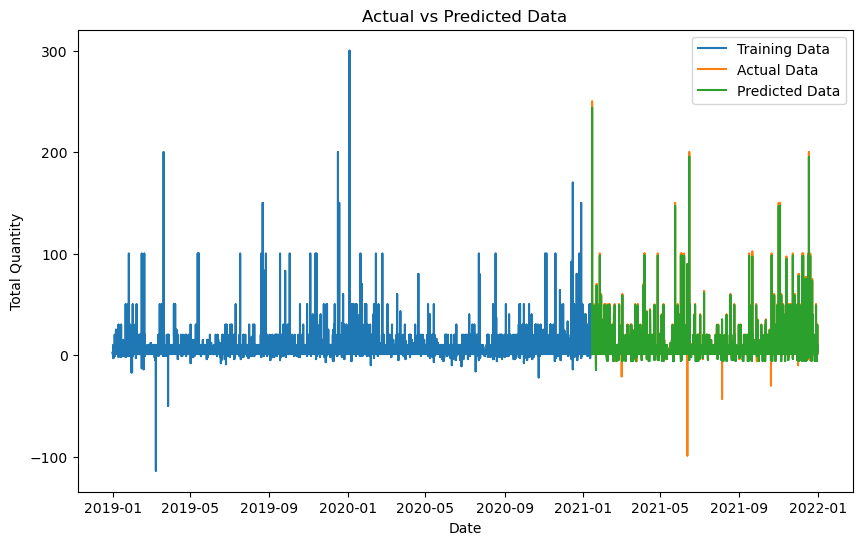

In [374]:
plt.figure(figsize=(10, 6))
plt.plot(train_df['ds'], train_df['y'], label='Training Data')
plt.plot(test_df['ds'], test_df['y'], label='Actual Data')
plt.plot(test_df['ds'], forecast_test['yhat'], label='Predicted Data')

plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.title('Actual vs Predicted Data')
plt.legend()
plt.show()

In [378]:
prophet_mae = mean_absolute_error(evaluation_df['y'], evaluation_df['yhat'])
prophet_mse = mean_squared_error(evaluation_df['y'], evaluation_df['yhat'])
prophet_r2_score = r2_score(evaluation_df['y'], evaluation_df['yhat'])

print(f"Mean Absolute Error: {prophet_mae}")
print(f"Mean Squared Error: {prophet_mse}")
print(f"R2 Score: {prophet_r2_score}")

Mean Absolute Error: 2.5796681871959413
Mean Squared Error: 31.700999260834912
R2 Score: -0.9049242451335975


In [379]:
# create table to compare models
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'Prophet'],
    'RMSE': [lr_model_rmse, rf_rmse, gb_rmse, 'None', prophet_mse],
    'R2 Score': [lr_model_r2_score, rf_r2_score, gb_r2_score, 'None', prophet_r2_score],
})

model_comparison

,Model,RMSE,R2 Score
0,Linear Regression,1.137348,0.907163
1,Random Forest,0.828833,0.950698
2,Gradient Boosting,0.828833,0.999254
3,XGBoost,None,None
4,Prophet,31.700999,-0.904924
